In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

AxesImage(54,36;334.8x217.44)
9


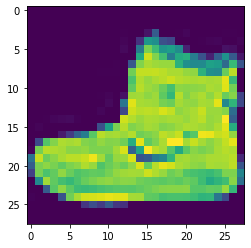

In [2]:
# Improving Computer Vision Accuracy using Convolutions
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(plt.imshow(training_images[0]))
print(training_labels[0])

In [3]:
training_images=training_images / 255.0
test_images=test_images / 255.0

In [4]:
print("training_images", training_images.shape)
print("training_labels", training_labels.shape)
print("test_images", test_images.shape)
print("test_labels", test_labels.shape)

training_images (60000, 28, 28)
training_labels (60000,)
test_images (10000, 28, 28)
test_labels (10000,)


In [5]:
# model 1 without using convolutions.
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,28,28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4964 - accuracy: 0.8259 - val_loss: 0.4252 - val_accuracy: 0.8446
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8651 - val_loss: 0.4330 - val_accuracy: 0.8348
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8770 - val_loss: 0.3744 - val_accuracy: 0.8626
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8852 - val_loss: 0.3606 - val_accuracy: 0.8718
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8912 - val_loss: 0.3607 - val_accuracy: 0.8741
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.8978 - val_loss: 0.3541 - val_accuracy: 0.8751
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - accuracy: 0.9020 - val_loss: 0.3463 - val_accuracy:

In [7]:
test_loss = model1.evaluate(test_images, test_labels)
print("test loss", test_loss[0])
print("test aaccuracy", test_loss[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8815
test loss 0.3416576385498047
test aaccuracy 0.8815000057220459


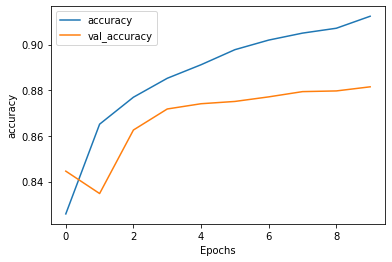

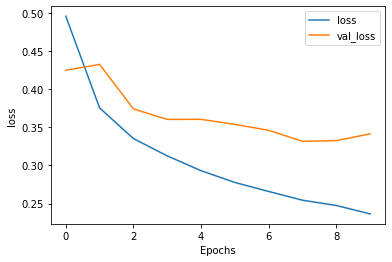

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

original value:  6
predicted value:  6
AxesImage(54,36;334.8x217.44)


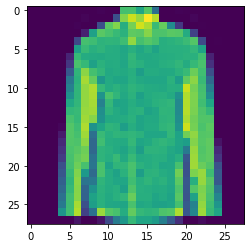

In [9]:
val = random.randint(0,10000)
result = model1.predict(test_images[val].reshape(-1, 1, 28, 28))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(test_images[val]))

original value:  8
predicted value:  8
AxesImage(54,36;334.8x217.44)


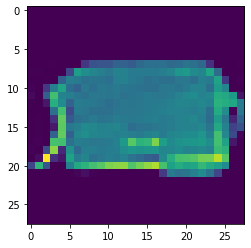

In [10]:
val = random.randint(0,10000)
result = model1.predict(test_images[val].reshape(-1, 1, 28, 28))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(test_images[val]))

## **MODEL 2 using convolutions**

In [11]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
(ti, tl), (tei, tel) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4426 - accuracy: 0.8388 - val_loss: 0.3415 - val_accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2933 - accuracy: 0.8924 - val_loss: 0.2958 - val_accuracy: 0.8941
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2496 - accuracy: 0.9080 - val_loss: 0.2909 - val_accuracy: 0.8953
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2190 - accuracy: 0.9189 - val_loss: 0.2992 - val_accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1928 - accuracy: 0.9286 - val_loss: 0.2518 - val_accuracy: 0.9073
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1685 - accuracy: 0.9373 - val_loss: 0.2563 - val_accuracy: 0.9098
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1501 - accuracy: 0.9435 - val_loss: 0.2772 -

In [15]:
test_loss = model.evaluate(test_images, test_labels)
print("test loss", test_loss[0])
print("test aaccuracy", test_loss[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.3129 - accuracy: 0.9062
test loss 0.3129176199436188
test aaccuracy 0.9061999917030334


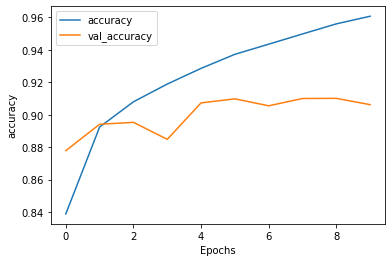

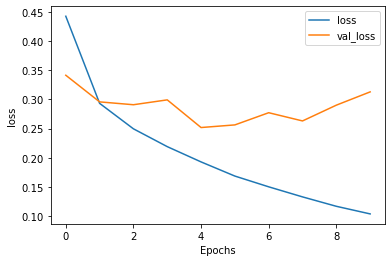

In [16]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

original value:  7
predicted value:  7
AxesImage(54,36;334.8x217.44)


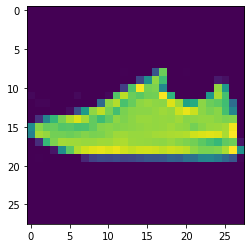

In [17]:
val = random.randint(0,10000)
result = model.predict(test_images[val].reshape(1, 28, 28, 1))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(tei[val]))

original value:  5
predicted value:  5
AxesImage(54,36;334.8x217.44)


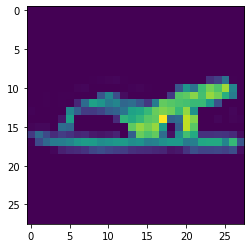

In [18]:
val = random.randint(0,10000)
result = model.predict(test_images[val].reshape(1, 28, 28, 1))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(tei[val]))

In [19]:
# with convolutions we can achive higher accuracy with training and validation dataset.
# this proves that convoliutions are better fit to work with when dealing with images.
"""
using DNN
313/313 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8815
test loss 0.3416576385498047
test aaccuracy 0.8815000057220459
using CNN
313/313 [==============================] - 3s 9ms/step - loss: 0.3129 - accuracy: 0.9062
test loss 0.3129176199436188
test aaccuracy 0.9061999917030334
"""

'\nusing DNN\n313/313 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8815\ntest loss 0.3416576385498047\ntest aaccuracy 0.8815000057220459\nusing CNN\n313/313 [==============================] - 3s 9ms/step - loss: 0.3129 - accuracy: 0.9062\ntest loss 0.3129176199436188\ntest aaccuracy 0.9061999917030334\n'